# Homework 1
## Arash Modaresi Rad

**Assignments:**

1.	Write a Python script to implement the bisection algorithm in Example 2.1 (page 23 of the Book: Computational Statistics by Givens & Hoeting).
 
Required Output:
(a)	Print the number of iterations and the final solution.
(b)	Plot Figure 2.1 produced by your Python script. 
(c)	Plot Figure 2.2 produced by your Python script. 



**Example 2.1 (A Simple Univariate Optimization)** To find the value ofx maximizing (2.2), we might take a0=1, b0=5, and x(0)=3. Figure 2.2 illustrates the first few steps of the bisection algorithm for this simple function.

In [1]:
import numpy as np
import matplotlib.pyplot as plt  
np.random.seed(1000)

Define Intial boundery conditions and stating point:

In [2]:
a0 = 1
b0 = 5
Start = 3

Define the derivative function:

In [3]:
def derivative(x):
    return (1 + (1 / x) - np.log(x)) / ((1 + x) ** 2)

The bisection algorithm:

In [4]:
itt = 0
i = 0
eps = 0.000000001
at = a0
xt = Start
bt = b0
xt_list = []
at_list = []
bt_list = []
for i in range(1000):
    if derivative(a0)*derivative(b0) > 0:
        print('Wrong intial boundery conditions!')
    else:
        if i == 0:
            xt_list.append(xt)
            at_list.append(at)
            bt_list.append(bt)
            error_criterion = np.absolute(xt)
            if error_criterion < eps:
                print('Solution found based on first error criterion: ' + str(xt) + ' Itteration: ' + str(i))
                break
            continue
        elif derivative(at)*derivative(xt) <= 0:
            bt = (at + bt) / 2
        else:
            at = (at + bt) / 2
            #at = at + ((bt - at) / 2)
        xt0 = xt
        xt = (at + bt) / 2
        error_criterion = np.absolute(xt - xt0) / (np.absolute(xt) + eps)
        itt = itt + 1
        xt_list.append(xt)
        at_list.append(at)
        bt_list.append(bt)
        if error_criterion < eps:
            print('Solution found based on error criterion: ' + str(xt))
            print('Itteration: ' + str(itt))
            break
else:
    print("The maximum number of itterations reached!") 

Solution found based on error criterion: 3.5911214780062437
Itteration: 30


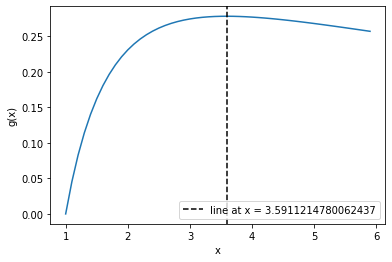

In [5]:
def PlotFigure(formula, ylabel):  
    x = np.arange(1, 6, 0.1, 'float')  
    y = eval(formula) 
    plt.plot(x, y) 
    plt.axvline(x=xt, color='k', label='line at x = {}'.format(xt), linestyle='--')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel(ylabel)
    plt.show()
PlotFigure('np.log(x)/(1+x)', 'g(x)')

Text(0, 0.5, 'xt values')

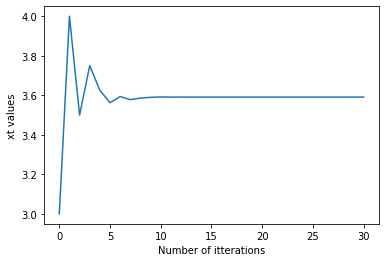

In [6]:
plt.plot(xt_list)
plt.xlabel('Number of itterations')
plt.ylabel('xt values')

Text(0, 0.5, 'at values')

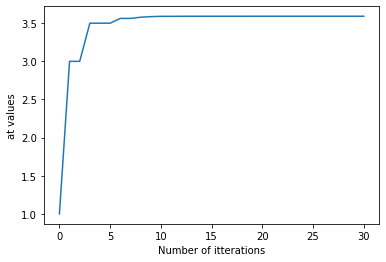

In [7]:
plt.plot(at_list)
plt.xlabel('Number of itterations')
plt.ylabel('at values')

Text(0, 0.5, 'bt values')

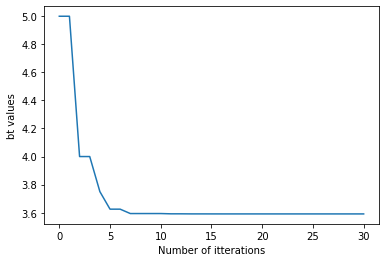

In [8]:
plt.plot(bt_list)
plt.xlabel('Number of itterations')
plt.ylabel('bt values')

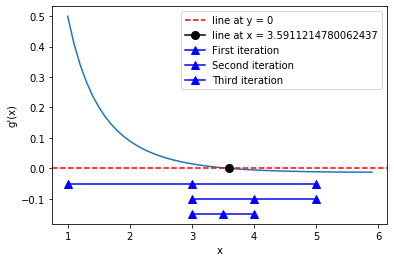

In [9]:
def PlotFigure(formula, ylabel):  
    x = np.arange(1, 6, 0.1, 'float')  
    y = eval(formula) 
    plt.plot(x, y) 
    plt.axhline(y=0, color='r', label='line at y = {}'.format(0), linestyle='--')
    plt.plot([xt], [0], label='line at x = {}'.format(xt), marker='o', markersize=8, color="k")
    plt.plot([at_list[0], xt_list[0], bt_list[0]], [-0.05, -0.05, -0.05], label= 'First iteration', marker='^', markersize=8, color="b")
    plt.plot([at_list[1], xt_list[1], bt_list[1]], [-0.1, -0.1, -0.1], label= 'Second iteration', marker='^', markersize=8, color="b")
    plt.plot([at_list[2], xt_list[2], bt_list[2]], [-0.15, -0.15, -0.15], label= 'Third iteration', marker='^', markersize=8, color="b")
    plt.legend()
    plt.xlabel('x')
    plt.ylabel(ylabel)
    plt.show()
PlotFigure('(1 + (1 / x) - np.log(x)) / ((1 + x) ** 2)', "g'(x)")